In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom_churn_df = pd.read_csv('telecom_churn_data.csv')
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# check if there is any row where every attribute is missing
missingDataCount = telecom_churn_df.isnull().all(axis=1).sum()
print("Number of rows with all missing attrubutes is", missingDataCount)

Number of rows with all missing attrubutes is 0


In [4]:
# Populate the resultant/dependent variable "churn"
telecom_churn_df['churn'] = telecom_churn_df.apply(lambda x: 1 if (x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0) else 0, axis=1)
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [5]:
# drop last-date columns as they contain same value for all rows i.e zero variation in data
telecom_churn_df.drop(columns=['last_date_of_month_6','last_date_of_month_7',
                               'last_date_of_month_8', 'last_date_of_month_9'], inplace=True)
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [6]:
# Find columns which contain same value for all rows of the data-set

temp_df = pd.DataFrame(telecom_churn_df.nunique()).reset_index()
temp_df.rename(columns={0:"count", "index":"column_name"}, inplace=True)

# Display the list of columns which have only one value
temp_df.loc[temp_df['count'] < 2]

,column_name,count
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
57,std_og_t2c_mou_6,1
58,std_og_t2c_mou_7,1
59,std_og_t2c_mou_8,1
60,std_og_t2c_mou_9,1
109,std_ic_t2o_mou_6,1
110,std_ic_t2o_mou_7,1


In [7]:
# Delete the columns that contain same value for all rows i.e zero variation in data

column_list = temp_df.loc[temp_df['count'] < 2]["column_name"].tolist()

telecom_churn_df.drop(columns = column_list, inplace=True)

telecom_churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [8]:
# Delete the columns which ends with _9, as we dont need to analyze the last month data 

telecom_churn_df.drop(columns= [col for col in telecom_churn_df if col.endswith('_9')], inplace=True)

telecom_churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,0,NaN,1.0,1.0,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,...,0,NaN,NaN,NaN,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,...,0,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0,0.0,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [9]:
# Impute the data for columns which are responsible for
# determining threshold value for defining high value custmer

telecom_churn_df['total_rech_data_6'].fillna(value = 0, inplace=True)
telecom_churn_df['total_rech_data_7'].fillna(value = 0, inplace=True)
telecom_churn_df['total_rech_data_8'].fillna(value = 0, inplace=True)

telecom_churn_df['av_rech_amt_data_6'].fillna(value = 0, inplace=True)
telecom_churn_df['av_rech_amt_data_7'].fillna(value = 0, inplace=True)
telecom_churn_df['av_rech_amt_data_8'].fillna(value = 0, inplace=True)


telecom_churn_df['max_rech_data_6'].fillna(value = 0, inplace=True)
telecom_churn_df['max_rech_data_7'].fillna(value = 0, inplace=True)
telecom_churn_df['max_rech_data_8'].fillna(value = 0, inplace=True)

#Impute the data 
telecom_churn_df['night_pck_user_6'].fillna(value = -1, inplace=True)
telecom_churn_df['night_pck_user_7'].fillna(value = -1, inplace=True)
telecom_churn_df['night_pck_user_8'].fillna(value = -1, inplace=True)

telecom_churn_df['fb_user_6'].fillna(value = -1, inplace=True)
telecom_churn_df['fb_user_7'].fillna(value = -1, inplace=True)
telecom_churn_df['fb_user_8'].fillna(value = -1, inplace=True)


In [10]:
# Calculate the total recharge amount in rupees for data-packs using 'total_rech_data_6' & 'av_rech_amt_data_6'

telecom_churn_df['total_rech_data_amt_6'] = telecom_churn_df['total_rech_data_6'] * telecom_churn_df['av_rech_amt_data_6']
telecom_churn_df['total_rech_data_amt_7'] = telecom_churn_df['total_rech_data_7'] * telecom_churn_df['av_rech_amt_data_7']
telecom_churn_df['total_rech_data_amt_8'] = telecom_churn_df['total_rech_data_8'] * telecom_churn_df['av_rech_amt_data_8']


In [11]:
# Calculate the average recharge amount using 'total_rech_amt_6', 'total_rech_amt_7', 
# 'total_rech_data_amt_6', 'total_rech_data_amt_7'

telecom_churn_df['avg_total_rech_amt'] = (telecom_churn_df['total_rech_amt_6'] 
                                          + telecom_churn_df['total_rech_amt_7'] 
                                          + telecom_churn_df['total_rech_data_amt_6']
                                          + telecom_churn_df['total_rech_data_amt_7'])/2

telecom_churn_df['avg_total_rech_amt'] 

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
5          60.0
6         360.5
7        1185.0
8         696.0
9         284.5
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        378.0
20        343.5
21        640.0
22        142.5
23        583.0
24        385.0
25        311.0
26        154.0
27         30.0
28         96.5
29         98.0
          ...  
99969     281.0
99970     691.0
99971     165.0
99972       0.0
99973     113.5
99974     465.0
99975      82.0
99976     244.5
99977      90.0
99978       0.0
99979      55.0
99980     354.5
99981     564.0
99982     154.0
99983     195.0
99984     618.5
99985      48.5
99986     864.0
99987     193.5
99988     544.0
99989     145.0
99990     210.0
99991     160.0
99992     120.0
99993       0.0
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Name: avg_total_rech_amt

In [12]:
# Calculate the threshold recharge amount to calculate high value prepaid customers

threshold_rech_amt = telecom_churn_df.avg_total_rech_amt.quantile(0.7)

threshold_rech_amt

478.0

In [13]:
# Filter data-rows corresponding to high value customer using threshold_rech_amt

high_value_cust_df = telecom_churn_df.loc[telecom_churn_df.avg_total_rech_amt > threshold_rech_amt]

high_value_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [14]:
# get the list of columns that contain more than 40/50 % NAN values

temp_df = pd.DataFrame((high_value_cust_df.isnull().sum(axis=0)/high_value_cust_df.shape[0])*100).reset_index()
temp_df.rename(columns={0:"count", "index":"column_name"}, inplace=True)
temp_df.loc[temp_df['count'] > 10]

,column_name,count
106,date_of_last_rech_data_6,44.112443
107,date_of_last_rech_data_7,43.117551
108,date_of_last_rech_data_8,46.799987
115,count_rech_2g_6,44.112443
116,count_rech_2g_7,43.117551
117,count_rech_2g_8,46.799987
118,count_rech_3g_6,44.112443
119,count_rech_3g_7,43.117551
120,count_rech_3g_8,46.799987
130,arpu_3g_6,44.112443


In [15]:
# Delete the columns that contain more than 40/50 % NAN values

column_list = temp_df.loc[temp_df['count'] > 10]["column_name"].tolist()

high_value_cust_df.drop(columns = column_list, inplace=True)

high_value_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [16]:
# Dropping mobile_number as its unique per data row and will not contribute anything to variance

high_value_cust_df.drop(columns = ["mobile_number"], inplace=True)

high_value_cust_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [17]:
# Dropping date columns as they do not add much value here

high_value_cust_df.drop(columns = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], inplace=True)

high_value_cust_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [18]:
# Replacing the labels of categorical columns with churn rate in each label 
# In order to run PCA we should not keep any categorical variables and 
# churn rate would be the perfect indicator of each category

# Doing categorical variable analysis for 'fb_user_6' column

fb_user_6_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 1.0]
positive_one_churn_fraction = fb_user_6_postive_one_rows["churn"].sum()/fb_user_6_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 1.0, ['fb_user_6']] = positive_one_churn_fraction.round(5)

fb_user_6_zero_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 0.0]
zero_churn_fraction = fb_user_6_zero_rows["churn"].sum()/fb_user_6_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 0.0, ['fb_user_6']] = zero_churn_fraction.round(5)

fb_user_6_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == -1.0]
negative_one_churn_fraction = fb_user_6_negative_one_rows["churn"].sum()/fb_user_6_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == -1.0, ['fb_user_6']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('fb_user_6').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
fb_user_6,,,,,,,,,,,,,,,,,,,,,
0.06686,15511,15511,15511,15166,15072,14752,15166,15072,14752,15166,...,15511,15511,15511,15511,15511,15511,15511,15511,15511,15511
0.07730,1229,1229,1229,1227,1224,1205,1227,1224,1205,1227,...,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229
0.09846,13213,13213,13213,13018,13121,12824,13018,13121,12824,13018,...,13213,13213,13213,13213,13213,13213,13213,13213,13213,13213


In [19]:
# Doing categorical variable analysis for 'fb_user_7' column

fb_user_7_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 1.0]
positive_one_churn_fraction = fb_user_7_postive_one_rows["churn"].sum()/fb_user_7_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 1.0, ['fb_user_7']] = positive_one_churn_fraction.round(5)

fb_user_7_zero_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 0.0]
zero_churn_fraction = fb_user_7_zero_rows["churn"].sum()/fb_user_7_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 0.0, ['fb_user_7']] = zero_churn_fraction.round(5)

fb_user_7_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == -1.0]
negative_one_churn_fraction = fb_user_7_negative_one_rows["churn"].sum()/fb_user_7_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == -1.0, ['fb_user_7']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('fb_user_7').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
fb_user_7,,,,,,,,,,,,,,,,,,,,,
0.05514,15705,15705,15705,15276,15369,15129,15276,15369,15129,15276,...,15705,15705,15705,15705,15705,15705,15705,15705,15705,15705
0.06602,1333,1333,1333,1327,1330,1314,1327,1330,1314,1327,...,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333
0.11452,12915,12915,12915,12808,12718,12338,12808,12718,12338,12808,...,12915,12915,12915,12915,12915,12915,12915,12915,12915,12915


In [20]:
# Doing categorical variable analysis for 'fb_user_8' column

fb_user_8_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 1.0]
positive_one_churn_fraction = fb_user_8_postive_one_rows["churn"].sum()/fb_user_8_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 1.0, ['fb_user_8']] = positive_one_churn_fraction.round(5)

fb_user_8_zero_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 0.0]
zero_churn_fraction = fb_user_8_zero_rows["churn"].sum()/fb_user_8_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 0.0, ['fb_user_8']] = zero_churn_fraction.round(5)

fb_user_8_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == -1.0]
negative_one_churn_fraction = fb_user_8_negative_one_rows["churn"].sum()/fb_user_8_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == -1.0, ['fb_user_8']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('fb_user_8').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
fb_user_8,,,,,,,,,,,,,,,,,,,,,
0.02434,14297,14297,14297,13949,13997,14000,13949,13997,14000,13949,...,14297,14297,14297,14297,14297,14297,14297,14297,14297,14297
0.06777,1638,1638,1638,1635,1635,1635,1635,1635,1635,1635,...,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638
0.14082,14018,14018,14018,13827,13785,13146,13827,13785,13146,13827,...,14018,14018,14018,14018,14018,14018,14018,14018,14018,14018


In [21]:
# Doing categorical variable analysis for 'night_pck_user_6' column

night_pck_user_6_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 1.0]
positive_one_churn_fraction = night_pck_user_6_postive_one_rows["churn"].sum()/night_pck_user_6_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 1.0, ['night_pck_user_6']] = positive_one_churn_fraction.round(5)

night_pck_user_6_zero_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 0.0]
zero_churn_fraction = night_pck_user_6_zero_rows["churn"].sum()/night_pck_user_6_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 0.0, ['night_pck_user_6']] = zero_churn_fraction.round(5)

night_pck_user_6_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == -1.0]
negative_one_churn_fraction = night_pck_user_6_negative_one_rows["churn"].sum()/night_pck_user_6_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == -1.0, ['night_pck_user_6']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('night_pck_user_6').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
night_pck_user_6,,,,,,,,,,,,,,,,,,,,,
0.06698,16333,16333,16333,15987,15896,15566,15987,15896,15566,15987,...,16333,16333,16333,16333,16333,16333,16333,16333,16333,16333
0.09337,407,407,407,406,400,391,406,400,391,406,...,407,407,407,407,407,407,407,407,407,407
0.09846,13213,13213,13213,13018,13121,12824,13018,13121,12824,13018,...,13213,13213,13213,13213,13213,13213,13213,13213,13213,13213


In [22]:
# Doing categorical variable analysis for 'night_pck_user_7' column

night_pck_user_7_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 1.0]
positive_one_churn_fraction = night_pck_user_7_postive_one_rows["churn"].sum()/night_pck_user_7_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 1.0, ['night_pck_user_7']] = positive_one_churn_fraction.round(5)

night_pck_user_7_zero_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 0.0]
zero_churn_fraction = night_pck_user_7_zero_rows["churn"].sum()/night_pck_user_7_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 0.0, ['night_pck_user_7']] = zero_churn_fraction.round(5)

night_pck_user_7_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == -1.0]
negative_one_churn_fraction = night_pck_user_7_negative_one_rows["churn"].sum()/night_pck_user_7_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == -1.0, ['night_pck_user_7']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('night_pck_user_7').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
night_pck_user_7,,,,,,,,,,,,,,,,,,,,,
0.05587,16663,16663,16663,16230,16327,16074,16230,16327,16074,16230,...,16663,16663,16663,16663,16663,16663,16663,16663,16663,16663
0.06133,375,375,375,373,372,369,373,372,369,373,...,375,375,375,375,375,375,375,375,375,375
0.11452,12915,12915,12915,12808,12718,12338,12808,12718,12338,12808,...,12915,12915,12915,12915,12915,12915,12915,12915,12915,12915


In [23]:
# Doing categorical variable analysis for 'night_pck_user_8' column

night_pck_user_8_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 1.0]
positive_one_churn_fraction = night_pck_user_8_postive_one_rows["churn"].sum()/night_pck_user_8_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 1.0, ['night_pck_user_8']] = positive_one_churn_fraction.round(5)


night_pck_user_8_zero_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 0.0]
zero_churn_fraction = night_pck_user_8_zero_rows["churn"].sum()/night_pck_user_8_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 0.0, ['night_pck_user_8']] = zero_churn_fraction.round(5)


night_pck_user_8_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == -1.0]
negative_one_churn_fraction = night_pck_user_8_negative_one_rows["churn"].sum()/night_pck_user_8_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == -1.0, ['night_pck_user_8']] = negative_one_churn_fraction.round(5)


high_value_cust_df.groupby('night_pck_user_8').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
night_pck_user_8,,,,,,,,,,,,,,,,,,,,,
0.02639,341,341,341,338,336,339,338,336,339,338,...,341,341,341,341,341,341,341,341,341,341
0.02886,15594,15594,15594,15246,15296,15296,15246,15296,15296,15246,...,15594,15594,15594,15594,15594,15594,15594,15594,15594,15594
0.14082,14018,14018,14018,13827,13785,13146,13827,13785,13146,13827,...,14018,14018,14018,14018,14018,14018,14018,14018,14018,14018


In [24]:
# Before Standardization, replace 0 for NA values in columns holding numeric values.
high_value_cust_df.fillna(0, inplace=True)

high_value_cust_df.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
                        ..
vol_3g_mb_7              0
vol_3g_mb_8              0
night_pck_user_6         0
night_pck_user_7         0
night_pck_user_8         0
monthly_2g_6             0
m

In [25]:
# Standardization of the columns 
# 
scaler = StandardScaler()
scaler.fit(high_value_cust_df)
# normalized_cust_df = pd.DataFrame(scaler.transform(high_value_cust_df))
normalized_cust_df = pd.DataFrame(scaler.transform(high_value_cust_df), columns = high_value_cust_df.columns)
print(normalized_cust_df.head())

# print(scaler.transform(high_value_cust_df))

     arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.784261 -0.721520 -0.587674    -0.567366    -0.558098    -0.510841   
1  1.107406  1.643033  5.302613    -0.441585    -0.444251    -0.396856   
2 -0.390789 -0.143614 -0.739908     0.332262     0.172765    -0.434372   
3 -0.096270  0.076231  0.256647    -0.344661    -0.283038    -0.325248   
4 -1.051229 -0.765100 -0.282646    -0.460896    -0.452621    -0.437642   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0     -0.774388     -0.757784     -0.695309      -0.211205   
1      0.164965      0.378512     -0.019115       0.001388   
2     -0.578284     -0.596243     -0.412142      -0.211205   
3      0.795786      1.038700      1.345016      -0.211205   
4     -0.597447     -0.578752     -0.268131      -0.211205   

          ...               aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0         ...         -0.252008   -0.329779   -0.403511   -0.137972   
1         ...         -0.425388   -0.264

In [26]:
# Please note that after standardization using Scaler() class
# our dependent variable "churn" changed from (1/0) format to (3.36320361/ -0.29733555)
# Because Logistic Regression expects Y variable in 1/0 format
# we need to change the value to 1/0 format

normalized_cust_df["churn"].unique()

array([ 3.36320361, -0.29733555])

In [27]:
# Convert dependent variable from float format to boolean format
normalized_cust_df["churn"] =  normalized_cust_df["churn"].apply(lambda x: 1 if x > 1 else 0)

In [28]:
y = normalized_cust_df["churn"]

X = normalized_cust_df.drop(columns = ["churn"], axis=1)
# 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

X_test.shape

(8986, 144)

In [29]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
# Let's see the plot - as the first Principal component has the highes variance so let's look at first two components
pca.components_

array([[ 1.14505027e-01,  1.19860362e-01,  1.07861285e-01, ...,
        -1.02812843e-01, -8.48113837e-02, -5.80086850e-02],
       [ 1.15043515e-01,  1.24203377e-01,  1.40211165e-01, ...,
         5.74551858e-02,  5.92274077e-02,  1.10918154e-01],
       [ 1.34730188e-01,  1.61540144e-01,  1.60185804e-01, ...,
         1.18327304e-01,  1.15440994e-01,  1.84998292e-01],
       ...,
       [ 0.00000000e+00,  3.13761212e-16,  1.13396367e-17, ...,
        -1.58623427e-01,  5.95535631e-17,  2.91996738e-01],
       [-0.00000000e+00,  1.25191477e-16, -7.73347095e-17, ...,
        -3.65739025e-01,  8.21541337e-17,  6.73258700e-01],
       [-0.00000000e+00,  9.75497937e-17, -8.64458991e-17, ...,
        -4.20391526e-02, -1.16241058e-17,  7.73863965e-02]])

In [31]:
pca_df = pd.DataFrame({'PC1': pca.components_[0],'PC2': pca.components_[1], 'Feature': list(X_train.columns)})
pca_df.head()

,PC1,PC2,Feature
0,0.114505,0.115044,arpu_6
1,0.119860,0.124203,arpu_7
2,0.107861,0.140211,arpu_8
3,0.120176,-0.019171,onnet_mou_6
4,0.127442,-0.016173,onnet_mou_7


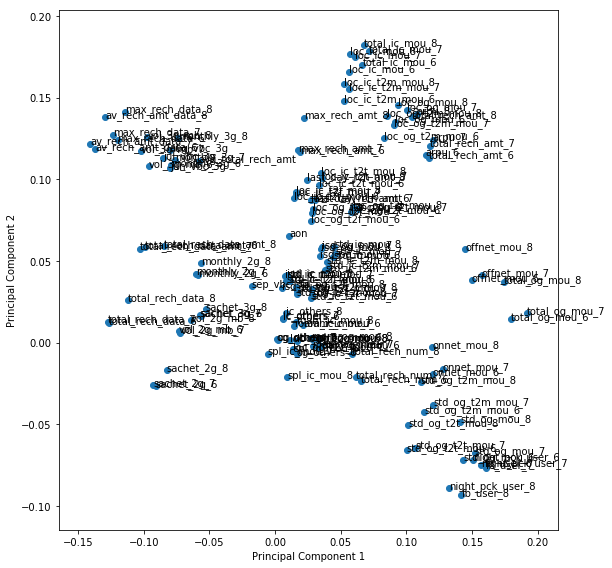

In [32]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i], pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [33]:
# Let's look at the scree plot to find the number of Principal Component needed

In [34]:
pca.explained_variance_ratio_

array([1.15110262e-01, 8.88681372e-02, 6.44293864e-02, 4.90014778e-02,
       4.10030714e-02, 3.51724867e-02, 2.95070206e-02, 2.63270072e-02,
       2.50785498e-02, 2.40909595e-02, 2.28034458e-02, 2.13262564e-02,
       2.03531589e-02, 1.97915955e-02, 1.87924814e-02, 1.63032681e-02,
       1.51530168e-02, 1.44045239e-02, 1.37255947e-02, 1.32039727e-02,
       1.23463100e-02, 1.21946455e-02, 1.15929523e-02, 1.13804859e-02,
       1.04162689e-02, 9.65019297e-03, 9.47710376e-03, 8.45345787e-03,
       8.12476975e-03, 8.01457165e-03, 7.53176040e-03, 7.32387306e-03,
       7.16292678e-03, 6.87340119e-03, 6.76179309e-03, 6.68321279e-03,
       6.42376911e-03, 6.02550981e-03, 5.94433135e-03, 5.74445992e-03,
       5.59465797e-03, 5.43510835e-03, 5.36543370e-03, 5.16916391e-03,
       4.92140439e-03, 4.79615396e-03, 4.60302598e-03, 4.55130691e-03,
       4.48483419e-03, 3.98693979e-03, 3.71195561e-03, 3.67042732e-03,
       3.60166460e-03, 3.40388438e-03, 3.30995060e-03, 3.25410426e-03,
      

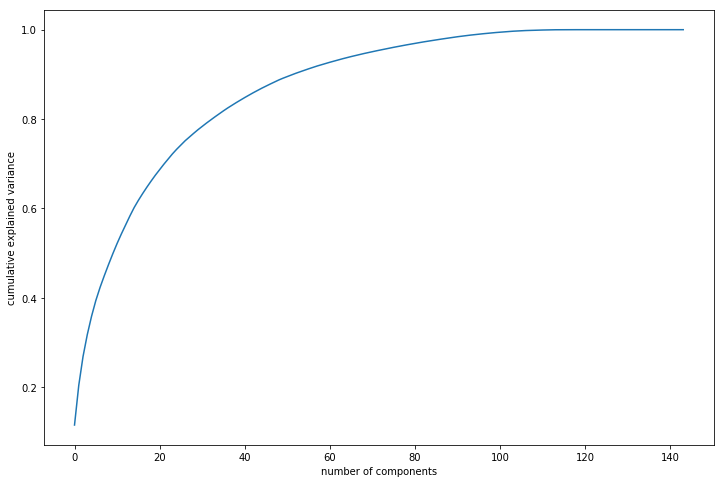

In [35]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [36]:
# We should use incremental PCA as it saves lots of time on large data set
from sklearn.decomposition import IncrementalPCA
incremental_pca = IncrementalPCA(n_components=16)

In [37]:
incremental_pca_train_df = incremental_pca.fit_transform(X_train)
incremental_pca_train_df.shape

(20967, 16)

In [38]:
# Creating correlation matrix for the principal components - we expect little to no correlation
correlation_matrix = np.corrcoef(incremental_pca_train_df.transpose())

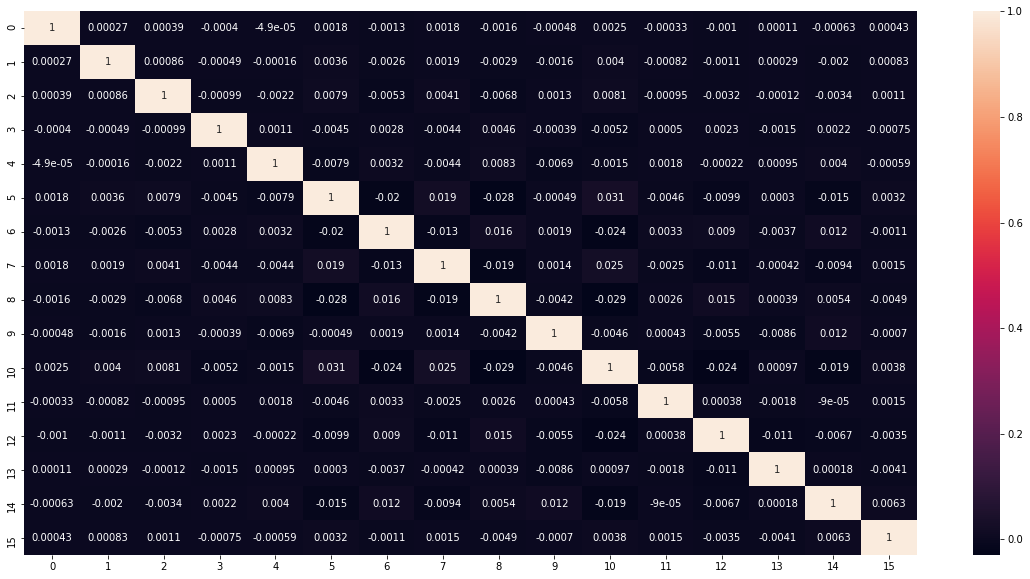

In [39]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix, annot = True)

In [40]:
# 1s -> 0s in diagonals
corrmat_nodiag = correlation_matrix - np.diagflat(correlation_matrix.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03104416321124031 , min corr:  -0.029056923793474295


In [41]:
#Applying selected components to the test data - 100 components
incremental_pca_test_df = incremental_pca.transform(X_test)
incremental_pca_test_df.shape

(8986, 16)

In [42]:
print("=============================== USING LOGISTIC REGRESSION ===================================================")

=============================== USING LOGISTIC REGRESSION ===================================================


In [43]:
# Create a Logistic Regression Model based on PCA Components
incremental_pca_learner = LogisticRegression(class_weight="balanced")
incremental_pca_model = incremental_pca_learner.fit(incremental_pca_train_df,y_train)

In [44]:
# Try running Logistic Regression Model created above on test data

y_pred_incremental_pca = incremental_pca_model.predict(incremental_pca_test_df)

In [45]:
confusion = metrics.confusion_matrix(y_test, y_pred_incremental_pca)
confusion

array([[6385, 1920],
       [ 147,  534]])

In [46]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred_incremental_pca))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.7699755174716225
Sensitivity 0.9774954072259645
Specificity 0.2176039119804401
Precision 0.7688139674894642


In [47]:
unsupervised_pca = PCA(0.95)

In [48]:
unsupervised_pca_train_df = unsupervised_pca.fit_transform(X_train)
unsupervised_pca_train_df.shape

(20967, 71)

In [49]:
# Create a Logistic Regression Model based on PCA Components
unsupervised_pca_learner = LogisticRegression(class_weight="balanced")
unsupervised_pca_model = unsupervised_pca_learner.fit(unsupervised_pca_train_df, y_train)

In [50]:
#Applying selected components to the test data - 71 components

unsupervised_pca_test_df = unsupervised_pca.transform(X_test)
unsupervised_pca_test_df.shape

(8986, 71)

In [51]:
# Try running Logistic Regression Model created above on test data

y_pred_unsupervised_pca = unsupervised_pca_model.predict(unsupervised_pca_test_df)

In [52]:
print("Classification Report")
print(classification_report(y_test, y_pred_unsupervised_pca))

print("Confusion Matrix")
confusion = metrics.confusion_matrix(y_test, y_pred_unsupervised_pca)
confusion

Classification Report
             precision    recall  f1-score   support

          0       0.98      0.80      0.88      8305
          1       0.26      0.84      0.40       681

avg / total       0.93      0.81      0.85      8986

Confusion Matrix


array([[6671, 1634],
       [ 107,  574]])

In [53]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred_unsupervised_pca))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.8062541731582462
Sensitivity 0.9842136323399233
Specificity 0.259963768115942
Precision 0.8032510535821794


In [54]:
print("=============================== USING RANDOM FOREST CLASSIFIER ==============================================")

=============================== USING RANDOM FOREST CLASSIFIER ==============================================


In [55]:
rfc = RandomForestClassifier(class_weight="balanced")

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
y_pred = rfc.predict(X_test)


In [57]:
print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

Classification Report
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8305
          1       0.77      0.42      0.54       681

avg / total       0.94      0.95      0.94      8986

Confusion Matrix


array([[8218,   87],
       [ 395,  286]])

In [58]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.9463610060093479
Sensitivity 0.9541390920701266
Specificity 0.7667560321715817
Precision 0.9895243829018664


In [59]:
print("List of important predictor attributes which help the business understand indicators of churn")

print("Note we are providing this list with default values of HYPER-PARAMETERS")

pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False).head(10)


,importance
loc_ic_mou_8,0.085970
loc_ic_t2m_mou_8,0.051724
loc_og_mou_8,0.044923
total_ic_mou_8,0.044771
total_rech_amt_8,0.040367
roam_og_mou_8,0.037675
arpu_8,0.036523
loc_og_t2t_mou_8,0.033523
std_ic_mou_8,0.027361
max_rech_amt_8,0.026604


In [60]:
# # Tuning max depth

# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'max_depth': range(2, 20, 5)}

# # instantiate the model
# rf = RandomForestClassifier(class_weight="balanced")


# # fit tree on training data
# grid_search = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# grid_search.fit(X_train, y_train)

# # scores of GridSearch CV
# scores = grid_search.cv_results_
# print(pd.DataFrame(scores).head(10))

# # plotting accuracies with max_depth
# plt.figure()
# plt.plot(scores["param_max_depth"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_max_depth"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("max_depth")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [61]:
# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'max_features': [4, 8, 14, 20, 24]}

# # instantiate the model
# rf = RandomForestClassifier(class_weight="balanced")


# # fit tree on training data
# grid_search = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")

# grid_search.fit(X_train, y_train)

# # scores of GridSearch CV
# scores = grid_search.cv_results_
# print(pd.DataFrame(scores).head())

# # plotting accuracies with max_features
# plt.figure()
# plt.plot(scores["param_max_features"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_max_features"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("max_features")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [62]:
# # GridSearchCV to find optimal min_samples_split

# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_split': range(200, 500, 50)}

# # instantiate the model
# rf = RandomForestClassifier(class_weight="balanced")


# # fit tree on training data
# grid_search = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")

# grid_search.fit(X_train, y_train)

# # scores of GridSearch CV
# scores = grid_search.cv_results_
# print(pd.DataFrame(scores).head())
      
# # plotting accuracies with min_samples_split
# plt.figure()
# plt.plot(scores["param_min_samples_split"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_min_samples_split"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("min_samples_split")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()
      
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)      

In [63]:
# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_leaf': range(100, 400, 50)}

# # instantiate the model
# rf = RandomForestClassifier(class_weight="balanced")


# # fit tree on training data
# grid_search = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# grid_search.fit(X_train, y_train)

# # scores of GridSearch CV
# scores = grid_search.cv_results_
# print(pd.DataFrame(scores).head())

# # plotting accuracies with min_samples_leaf
# plt.figure()
# plt.plot(scores["param_min_samples_leaf"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_min_samples_leaf"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("min_samples_leaf")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [64]:
print("=================HYPER PARAMETER TUNING USING RANDOM FOREST CLASSIFIER ===================================")

=================HYPER PARAMETER TUNING USING RANDOM FOREST CLASSIFIER ===================================


In [65]:
## Grid Search to Find Optimal Hyperparameters

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300], 
    'max_features': [5, 8, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [66]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [67]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9016072876424858 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [68]:
rfc_with_hp_tuning = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100, 
                             class_weight="balanced")

In [69]:
rfc_with_hp_tuning.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [70]:
# predict
y_pred = rfc_with_hp_tuning.predict(X_test)

In [71]:
print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

Classification Report
             precision    recall  f1-score   support

          0       0.98      0.91      0.94      8305
          1       0.42      0.76      0.54       681

avg / total       0.94      0.90      0.91      8986

Confusion Matrix


array([[7582,  723],
       [ 161,  520]])

In [72]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.9016247496105052
Sensitivity 0.9792070257006328
Specificity 0.41834271922767496
Precision 0.9129440096327514


In [73]:
print("List of important predictor attributes which help the business understand indicators of churn")

print("Note we are providing this list aftering doing tuning of HYPER-PARAMETERS")

pd.DataFrame(rfc_with_hp_tuning.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False).head(10)


,importance
total_ic_mou_8,0.103609
loc_ic_mou_8,0.098087
last_day_rch_amt_8,0.069422
loc_ic_t2m_mou_8,0.064834
total_rech_amt_8,0.058487
total_og_mou_8,0.055324
loc_ic_t2t_mou_8,0.049891
loc_og_t2t_mou_8,0.042070
loc_og_t2m_mou_8,0.039624
loc_og_mou_8,0.036926


In [74]:
lm = LogisticRegression(class_weight="balanced")
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True False  True False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False  True  True
 False False False False  True False False False False False False False
 False False  True False  True  True False  True  True False  True  True
 False False False False False  True False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False  True False  True  True False False False
 False False False False False False False False False False False  True
 False False  True False False False False False False False False False
 False False  True  True False False False  True False False False False]
[  1  20  31  84 114   1  37   1   5  54  95 115  53   2 110  85 119   1
  25  18 109 118  68  87  81  80  60  86  70  71  

In [75]:
#function for calculating VIF
def vif_cal(input_data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)



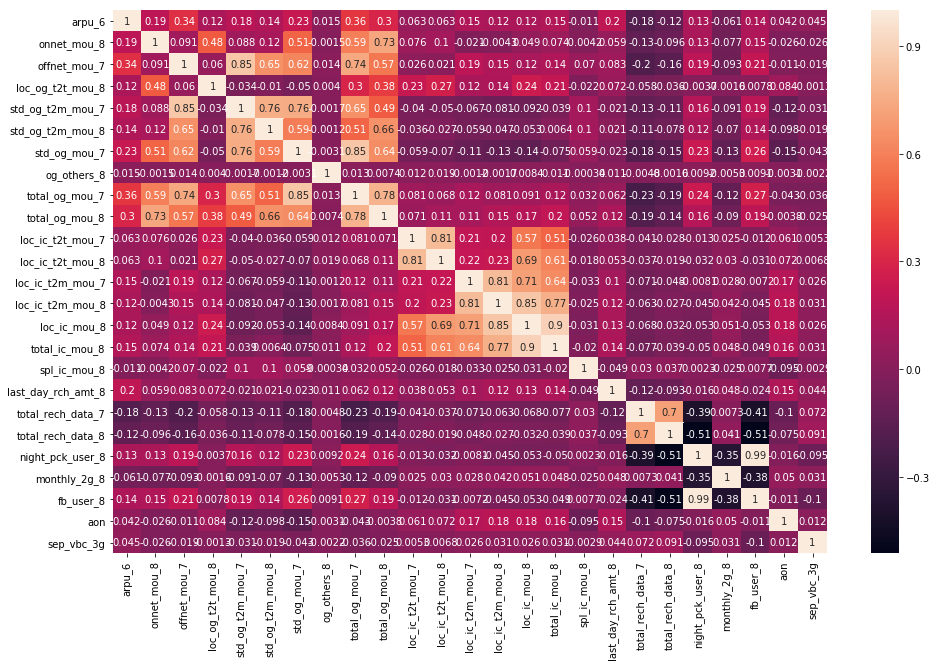

In [76]:
rfe_columns = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_columns]
X_test_rfe = X_test[rfe_columns]

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(normalized_cust_df[rfe_columns].corr(), annot = True)

In [77]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm1.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20941
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3958.7
Date:                Sun, 26 Aug 2018   Deviance:                       7917.3
Time:                        23:39:19   Pearson chi2:                 8.27e+05
No. Iterations:                    12   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4967      0.100    -44.810      0.000      -4.693      -4.300
arpu_6                 0.248

In [78]:
###########################Model 2 ################
X_train_rfe = X_train_rfe.drop(['loc_ic_mou_8', 'og_others_8', 'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8'], axis=1)

lm2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm2.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3997.5
Date:                Sun, 26 Aug 2018   Deviance:                       7994.9
Time:                        23:39:20   Pearson chi2:                 1.56e+07
No. Iterations:                    10   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3395      0.086    -50.648      0.000      -4.507      -4.172
arpu_6                 0.279

In [79]:
###########################Model 2 ################
X_train_rfe = X_train_rfe.drop(['std_og_t2m_mou_7', 'monthly_2g_8'], axis=1)

lm3 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm3.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20948
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.2
Date:                Sun, 26 Aug 2018   Deviance:                       8024.5
Time:                        23:39:21   Pearson chi2:                 9.91e+06
No. Iterations:                    10   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3068      0.085    -50.796      0.000      -4.473      -4.141
arpu_6                 0.289

In [80]:
###########################Model 4 ################
X_train_rfe = X_train_rfe.drop(['fb_user_8' ], axis=1)

lm4 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm4.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20949
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4040.7
Date:                Sun, 26 Aug 2018   Deviance:                       8081.5
Time:                        23:39:21   Pearson chi2:                 9.39e+06
No. Iterations:                    10   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3011      0.085    -50.467      0.000      -4.468      -4.134
arpu_6                 0.294

In [81]:
###########################Model 5 ################
X_train_rfe = X_train_rfe.drop(['sep_vbc_3g' ], axis=1)

lm5 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm5.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20950
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4068.5
Date:                Sun, 26 Aug 2018   Deviance:                       8137.1
Time:                        23:39:22   Pearson chi2:                 1.05e+07
No. Iterations:                     9   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1644      0.075    -55.748      0.000      -4.311      -4.018
arpu_6                 0.286

In [82]:
###########################Model 6 ################
X_train_rfe = X_train_rfe.drop(['std_og_t2m_mou_8' ], axis=1)

lm6 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm6.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4085.2
Date:                Sun, 26 Aug 2018   Deviance:                       8170.5
Time:                        23:39:22   Pearson chi2:                 2.94e+07
No. Iterations:                     9   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1616      0.075    -55.399      0.000      -4.309      -4.014
arpu_6                 0.270

In [83]:
###########################Model 7 ################
X_train_rfe = X_train_rfe.drop(['onnet_mou_8' ], axis=1)

lm7 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm7.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4092.3
Date:                Sun, 26 Aug 2018   Deviance:                       8184.7
Time:                        23:39:23   Pearson chi2:                 2.62e+07
No. Iterations:                     9   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1615      0.075    -55.312      0.000      -4.309      -4.014
arpu_6                 0.278

In [84]:
###########################Model 8 ################
X_train_rfe = X_train_rfe.drop(['total_ic_mou_8' ], axis=1)

lm8 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm8.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4340.2
Date:                Sun, 26 Aug 2018   Deviance:                       8680.4
Time:                        23:39:23   Pearson chi2:                 2.88e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7549      0.065    -57.343      0.000      -3.883      -3.627
arpu_6                 0.276

In [85]:
###########################Model 9 ################

X_train_rfe = X_train_rfe.drop(['loc_ic_t2t_mou_7' ], axis=1)

lm9 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm9.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4341.0
Date:                Sun, 26 Aug 2018   Deviance:                       8682.0
Time:                        23:39:23   Pearson chi2:                 2.99e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7596      0.066    -57.380      0.000      -3.888      -3.631
arpu_6                 0.276

In [86]:
###########################Model 10 ################

X_train_rfe = X_train_rfe.drop(['arpu_6' ], axis=1)

lm10 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

print(lm10.fit().summary())

print(vif_cal(input_data=X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20955
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4389.7
Date:                Sun, 26 Aug 2018   Deviance:                       8779.4
Time:                        23:39:24   Pearson chi2:                 2.73e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7654      0.066    -57.225      0.000      -3.894      -3.636
offnet_mou_7           0.182

In [87]:

X_test_rfe = X_test_rfe.drop(['loc_ic_mou_8', 'og_others_8', 'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
                             'std_og_t2m_mou_7', 'monthly_2g_8', 'fb_user_8', 'sep_vbc_3g', 'std_og_t2m_mou_8', 
                              'onnet_mou_8', 'total_ic_mou_8', 'loc_ic_t2t_mou_7', 'arpu_6'], axis=1)

X_test_rfe = sm.add_constant(X_test_rfe,has_constant='add')

In [88]:
logsk = LogisticRegression(class_weight="balanced")
logsk.fit(X_train_rfe, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [89]:
 y_pred_rfe = logsk.predict(X_test_rfe)

In [90]:
print("Classification Report")
print(classification_report(y_test, y_pred_rfe))

print("Confusion Matrix")
confusion = metrics.confusion_matrix(y_test, y_pred_rfe)
confusion

Classification Report
             precision    recall  f1-score   support

          0       0.98      0.78      0.87      8305
          1       0.23      0.81      0.36       681

avg / total       0.92      0.78      0.83      8986

Confusion Matrix


array([[6478, 1827],
       [ 132,  549]])

In [91]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred_rfe))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.7819942132205653
Sensitivity 0.9800302571860817
Specificity 0.23106060606060605
Precision 0.7800120409391933


In [92]:
print("After doing RECURSIVE FEATURE ELIMINATION AND THEN APPLYING LOGISTIC REGRESSION on reduced feature set")
print("We have come up with list of important feature which are strong indicators of churn")
print("Those fields are as follows:")
pd.DataFrame(X_train_rfe.columns, columns=['importance'])

After doing RECURSIVE FEATURE ELIMINATION AND THEN APPLYING LOGISTIC REGRESSION on reduced feature set
We have come up with list of important feature which are strong indicators of churn
Those fields are as follows:


,importance
0,const
1,offnet_mou_7
2,loc_og_t2t_mou_8
3,std_og_mou_7
4,total_og_mou_8
5,loc_ic_t2m_mou_7
6,spl_ic_mou_8
7,last_day_rch_amt_8
8,total_rech_data_7
9,total_rech_data_8


In [98]:
print("FINAL LIST OF PREDICTOR ATTRIBUTES FOR DEFINING WHETHER A CUSTOMER WILL CHURN OR NOT CHURN")

print("THIS LIST IS TAKEN FROM RANDOM FOREST CLASSIFIER WITH HYPER PARAMETER TUNING")

pd.DataFrame(rfc_with_hp_tuning.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False).head(10)


FINAL LIST OF PREDICTOR ATTRIBUTES FOR DEFINING WHETHER A CUSTOMER WILL CHURN OR NOT CHURN
THIS LIST IS TAKEN FROM RANDOM FOREST CLASSIFIER WITH HYPER PARAMETER TUNING


,importance
total_ic_mou_8,0.103609
loc_ic_mou_8,0.098087
last_day_rch_amt_8,0.069422
loc_ic_t2m_mou_8,0.064834
total_rech_amt_8,0.058487
total_og_mou_8,0.055324
loc_ic_t2t_mou_8,0.049891
loc_og_t2t_mou_8,0.042070
loc_og_t2m_mou_8,0.039624
loc_og_mou_8,0.036926


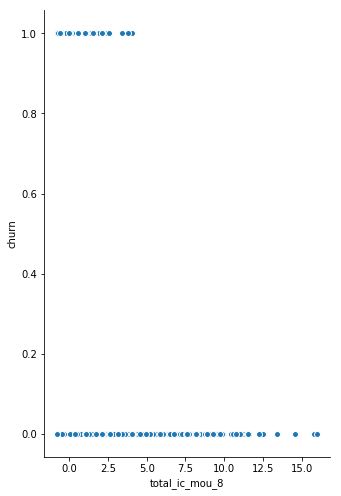

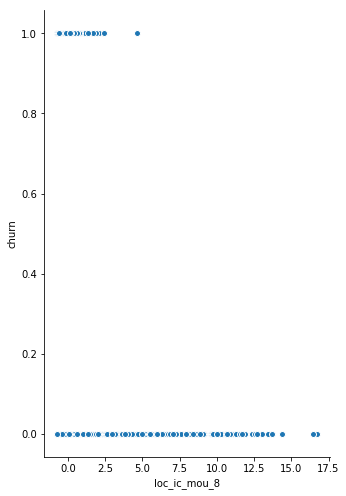

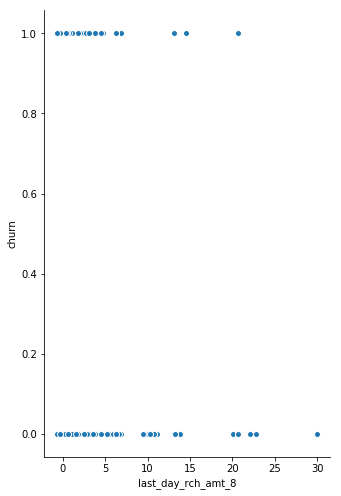

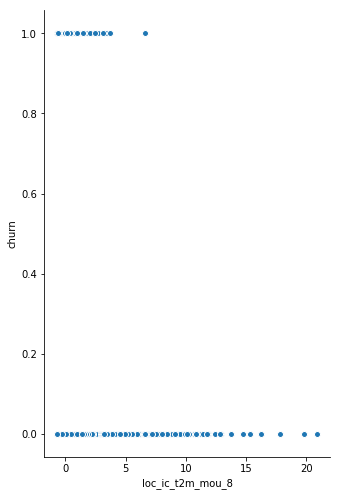

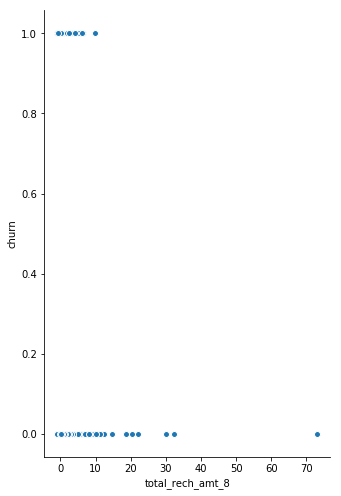

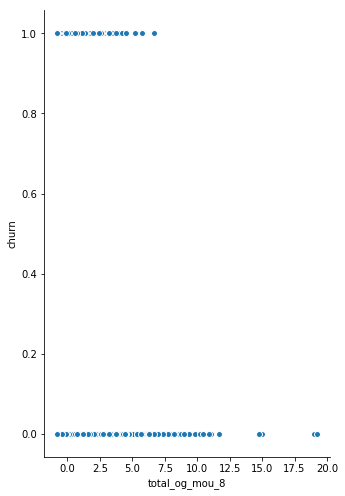

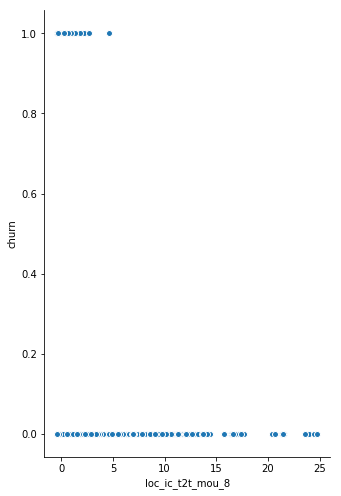

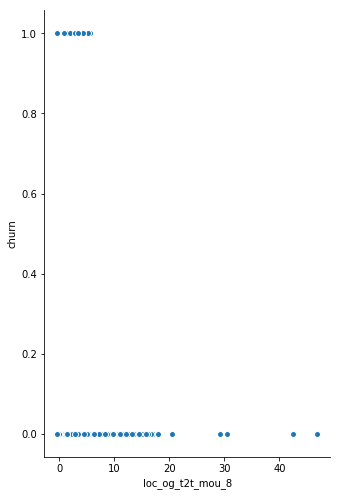

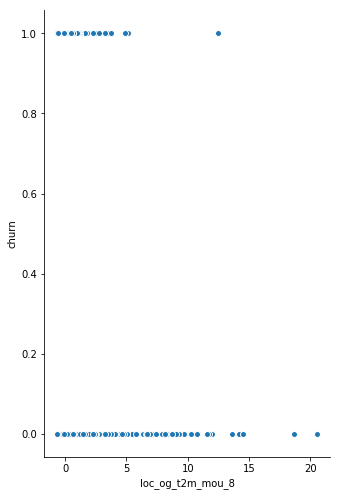

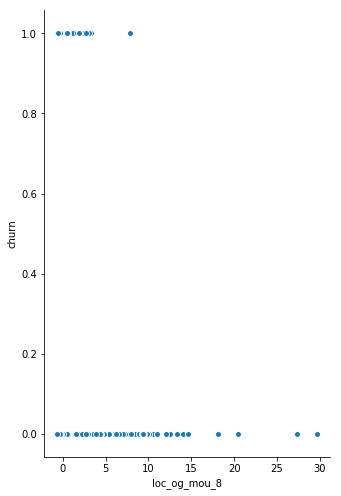

In [99]:

sns.pairplot(normalized_cust_df, x_vars=['total_ic_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['loc_ic_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['last_day_rch_amt_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['loc_ic_t2m_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['total_rech_amt_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['total_og_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['loc_ic_t2t_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['loc_og_t2t_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['loc_og_t2m_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

sns.pairplot(normalized_cust_df, x_vars=['loc_og_mou_8'], y_vars='churn',size=7, aspect=0.7, kind='scatter')

